In [169]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from scipy.stats import probplot 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer






In [170]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(10)

,Survived,Age,Fare
386,0,1.0,46.9000
426,1,28.0,26.0000
133,1,29.0,26.0000
832,0,NaN,7.2292
220,1,16.0,8.0500
541,0,9.0,31.2750
540,1,36.0,71.0000
528,0,39.0,7.9250
890,0,32.0,7.7500
497,0,NaN,15.1000


In [171]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [172]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [173]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [174]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [175]:
df['Age'].mean()

29.69911764705882

In [176]:
df['Age'].median()

28.0

In [177]:
df['Age'].min()

0.42

In [178]:
df['Age'].max()

80.0

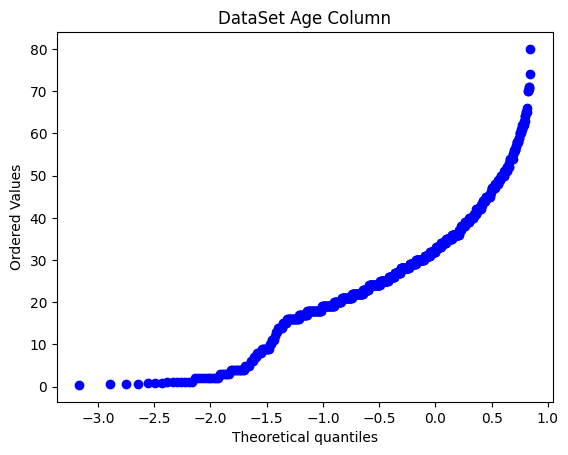

In [179]:
probplot(df['Age'],plot=plt)
plt.title('DataSet Age Column')
plt.savefig('DataSet Age Column.png')
plt.show()
plt.show()

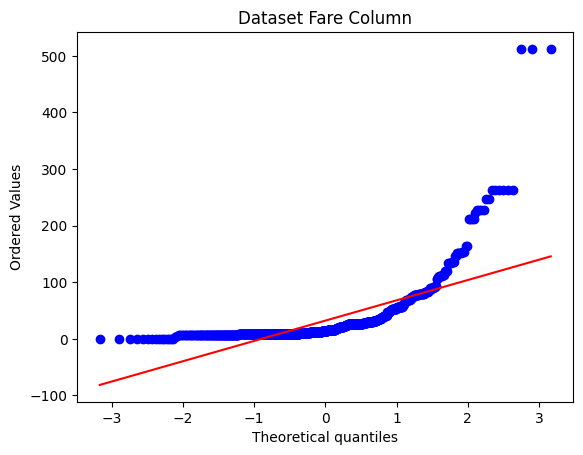

In [180]:
probplot(df['Fare'],plot=plt)
plt.title('Dataset Fare Column')
plt.savefig('Dataset Fare Column.png')
plt.show()

# Splitting the DataSet into Training And Testing Group 

In [181]:
x=df.drop(columns=['Survived'])
y=df.drop(columns=['Age','Fare']).values.ravel()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=42)


In [182]:
x_train

,Age,Fare
409,NaN,25.4667
7,2.0,21.0750
580,25.0,30.0000
155,51.0,61.3792
880,25.0,26.0000
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [183]:
x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15940\596533929.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)


In [184]:
x_train

,Age,Fare
409,29.363173,25.4667
7,2.000000,21.0750
580,25.000000,30.0000
155,51.000000,61.3792
880,25.000000,26.0000
...,...,...
106,21.000000,7.6500
270,29.363173,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [185]:
x_train.isna().sum()

Age     0
Fare    0
dtype: int64

## Filling the Null  Values 

In [186]:
x_test.mean(numeric_only=True)

Age     30.757733
Fare    32.644080
dtype: float64

In [187]:
x_train.mean(numeric_only=True)

Age     29.363173
Fare    32.065164
dtype: float64

In [188]:
x_test.fillna(x_test['Age'].mean(),inplace=True)

In [189]:
x_test

,Age,Fare
709,30.757733,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
482,50.000000,8.0500
377,27.000000,211.5000
365,30.000000,7.2500
412,33.000000,90.0000


# Plotting After Split 

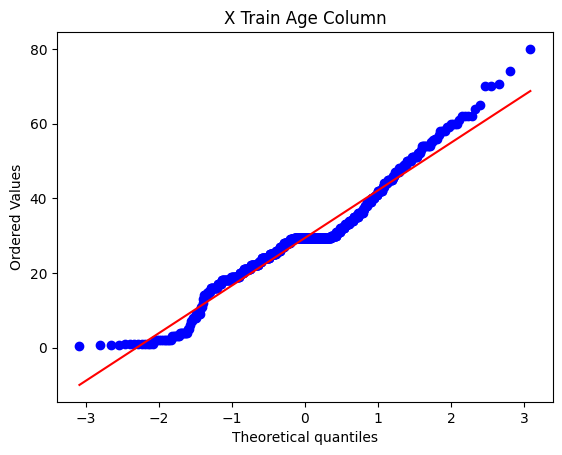

In [190]:
probplot(x_train['Age'],plot=plt)
plt.title('X Train Age Column')
plt.savefig('X Train Age Column.png')
plt.show()

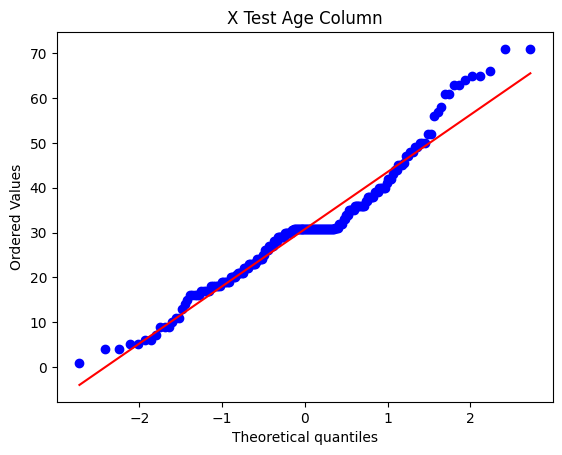

In [191]:
probplot(x_test['Age'],plot=plt)
plt.title('X Test Age Column')
plt.savefig('X Test Age Column.png')
plt.show()

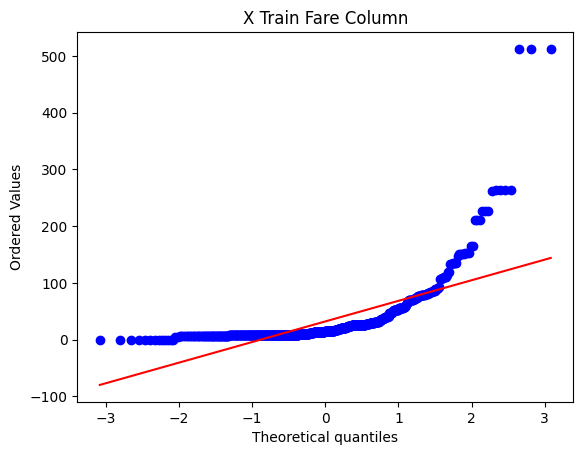

In [192]:
probplot(x_train['Fare'],plot=plt)
plt.title('X Train Fare Column')
plt.savefig('X Train Fare Column.png')
plt.show()

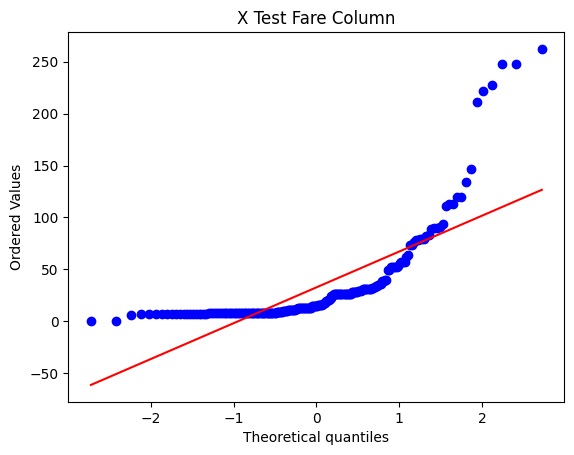

In [193]:
probplot(x_test['Fare'],plot=plt)
plt.title('X Test Fare Column')
plt.savefig('X Test Fare Column.png')
plt.show()

# Now Training the Model Using BOth Algorithms 

In [194]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [195]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train) 

y_pred_clf1=clf1.predict(x_test)
y_pred_clf2=clf2.predict(x_test)

print('The accuracy Score For Logistic Regression is=\t',accuracy_score(y_test,y_pred_clf1))
print('The accuracy Score For Decision Tree Classifier is=\t',accuracy_score(y_test,y_pred_clf2))


The accuracy Score For Logistic Regression is=	 0.6588785046728972
The accuracy Score For Decision Tree Classifier is=	 0.6635514018691588


# Now Applying Log Transformation 

In [196]:
trf=FunctionTransformer(func=np.log1p)

x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

print('The x Train transformed is=\t',x_train_transformed)
print('The x Test transformed is=\t',x_test_transformed)

The x Train transformed is=	           Age      Fare
409  3.413230  3.275887
7    1.098612  3.094446
580  3.258097  3.433987
155  3.951244  4.133232
880  3.258097  3.295837
..        ...       ...
106  3.091042  2.157559
270  3.413230  3.465736
860  3.737670  2.715244
435  2.708050  4.795791
102  3.091042  4.360388

[677 rows x 2 columns]
The x Test transformed is=	           Age      Fare
709  3.458136  2.787834
439  3.465736  2.442347
840  3.044522  2.188856
720  1.945910  3.526361
39   2.708050  2.504848
..        ...       ...
482  3.931826  2.202765
377  3.332205  5.358942
365  3.433987  2.110213
412  3.526361  4.510860
468  3.458136  2.166192

[214 rows x 2 columns]


In [197]:
x_train_transformed

,Age,Fare
409,3.413230,3.275887
7,1.098612,3.094446
580,3.258097,3.433987
155,3.951244,4.133232
880,3.258097,3.295837
...,...,...
106,3.091042,2.157559
270,3.413230,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [198]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)


y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)


print('The accuracy Score For Logistic Regression is=\t',accuracy_score(y_test,y_pred1))
print('The accuracy Score For Decision Tree Classifier is=\t',accuracy_score(y_test,y_pred2))

The accuracy Score For Logistic Regression is=	 0.7149532710280374
The accuracy Score For Decision Tree Classifier is=	 0.5981308411214953


# Using Cross Validation Score to Check the Accuracy 

In [199]:
x.fillna(np.mean(x),inplace=True)
x_transformed=trf.fit_transform(x)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print('Logistic Regression=\t',np.mean(cross_val_score(clf1,x_transformed,y,scoring='accuracy',n_jobs=-1,cv=8)))
print('Decision Tree Classifier=\t',np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',n_jobs=-1,cv=8)))



Logistic Regression=	 0.6780385296010296
Decision Tree Classifier=	 0.6442245817245817


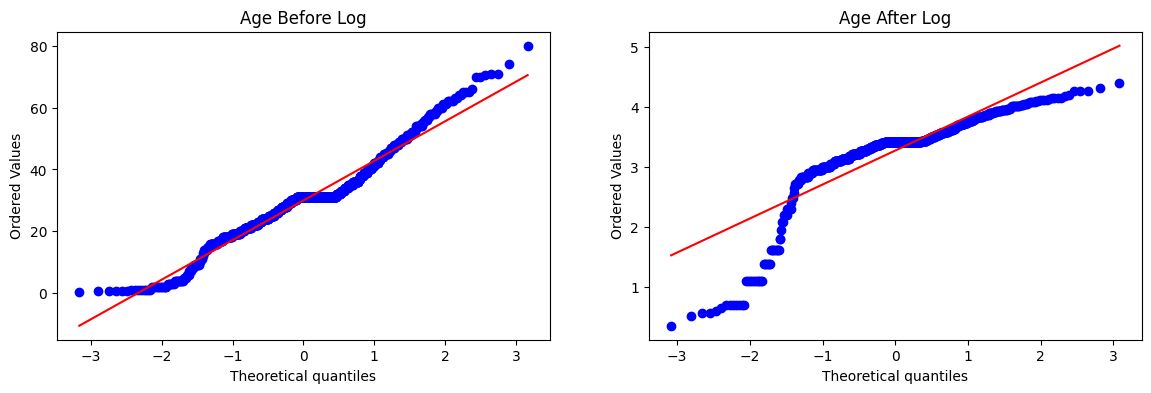

In [200]:
plt.figure(figsize=(14,4))

plt.subplot(121)
probplot(x['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')
plt.savefig('Age Before and After Aplying Log.png')
plt.show()

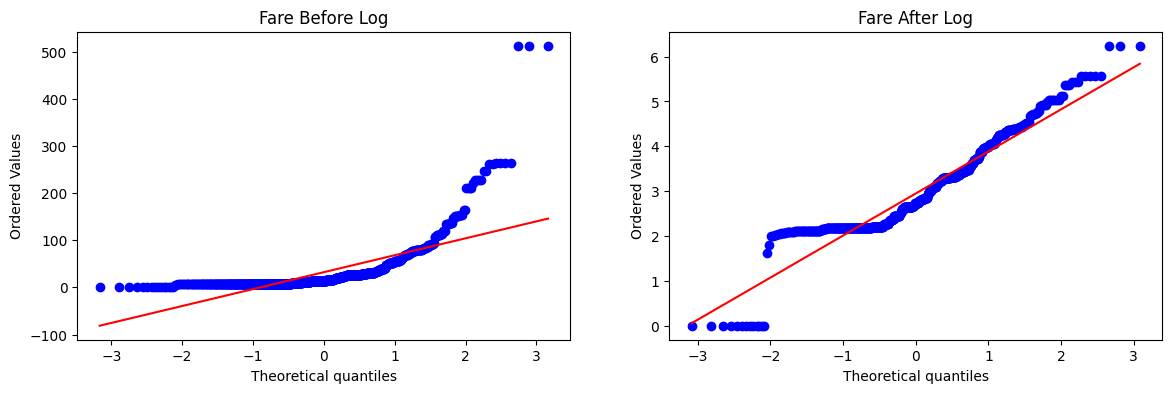

In [201]:
plt.figure(figsize=(14,4))

plt.subplot(121)
probplot(x['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')
plt.savefig('Fare Before and After Aplying Log.png')
plt.show()

# NOw Applying the Column Transformer on the Fare Column Only 

In [202]:
trf2=ColumnTransformer([('log_transformation',FunctionTransformer(np.log1p),['Fare'])],n_jobs=-1,remainder='passthrough')

x_train_transformed2=trf2.fit_transform(x_train) 
x_test_Transformed2=trf2.transform(x_test)



In [203]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred_1=clf1.predict(x_test_Transformed2)
y_pred_2=clf2.predict(x_test_Transformed2)


print("Accuracy LR",accuracy_score(y_test,y_pred_1))
print("Accuracy DT",accuracy_score(y_test,y_pred_2))



Accuracy LR 0.6728971962616822
Accuracy DT 0.6588785046728972


In [204]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644319600499375


In [221]:
def apply_tramnsformation(transform): 
    trf=ColumnTransformer([('manual_transform',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_transform1=trf.fit_transform(x)
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,x_transform1,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before  Transform')

    plt.subplot(122)
    probplot(x_transform1[:,0], dist="norm", plot=plt)
    plt.title('Fare After  Transform') 
    save = 'Fare_Before_and_After_applying_Manual_Transformation.png'
    plt.savefig(save)
    plt.show()




Accuracy 0.6195131086142323


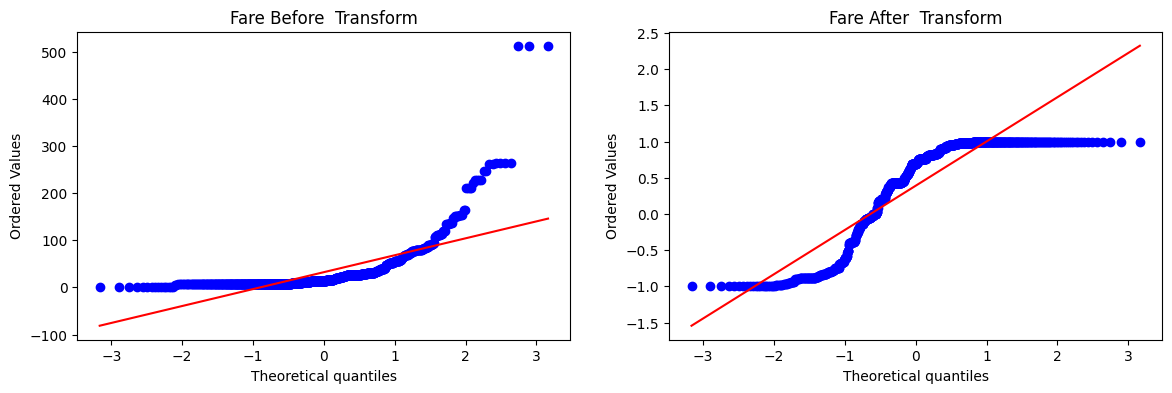

In [225]:
apply_tramnsformation(np.sin)

Accuracy 0.6431335830212235


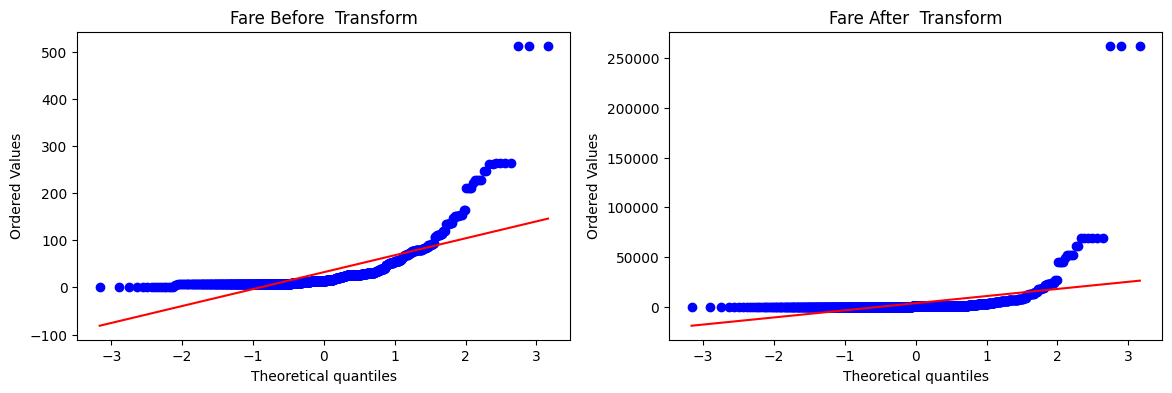

In [224]:
apply_tramnsformation(lambda x:x*x)